<a href="https://colab.research.google.com/github/xoxominji/22-1-ESAA-Practice/blob/main/0603_%EB%B0%95%EB%AF%BC%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [필사]

## 파이썬 딥러닝 텐서플로 PART03 케라스(Keras)

### 3.6 모델 저장 및 불러오기

In [ ]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax'), # 노드는 10개가 되어야 한다.
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train,
            validation_data=(x_test, y_test), 
            epochs=10, 
            )

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2227 - accuracy: 0.9323 - val_loss: 0.1067 - val_accuracy: 0.9669
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0920 - accuracy: 0.9716 - val_loss: 0.0778 - val_accuracy: 0.9749
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0638 - accuracy: 0.9798 - val_loss: 0.0870 - val_accuracy: 0.9728
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0497 - accuracy: 0.9840 - val_loss: 0.0872 - val_accuracy: 0.9749
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0406 - accuracy: 0.9869 - val_loss: 0.0838 - val_accuracy: 0.9774
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0300 - accuracy: 0.9898 - val_loss: 0.0853 - val_accuracy: 0.9764
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0295 - accuracy: 0.9907 - val_loss: 0.0871 - val_accuracy:

#### 모델을 파일로 저장

: `save()`메서드
  - HDF5 포맷 형식: 대용량의 데이터 저장 위한 파일 형식 (.h5포함할 것)
  - SavedModel(형식 지정 생략시 자동 지원)

In [ ]:
# 모델을 h5 포맷으로 저장
model.save('h5-model.h5')

#### 저장된 모델 복원

`tensorflow.keras.models.load_model()`

In [ ]:
# 모델 복원
h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 검증
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

h5 model] loss: 0.09734, acc: 0.97700


In [ ]:
# 모델을 SavedModel 포맷으로 저장
model.save('saved-model')

INFO:tensorflow:Assets written to: saved-model/assets


In [ ]:
# SavedModel 형식 모델 복원
saved_model = tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 검증 (HDF5 포맷)
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

# 모델 검증 (SavedModel 포맷)
loss, acc = saved_model.evaluate(x_test, y_test, verbose=0)
print(f'saved_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5 model] loss: 0.09734, acc: 0.97700
saved_model] loss: 0.09734, acc: 0.97700


> SavedModel형식과 HDF5형식 성능 동일함

### 3.7 복잡한 모델 생성

#### 함수형 API(Functional API)

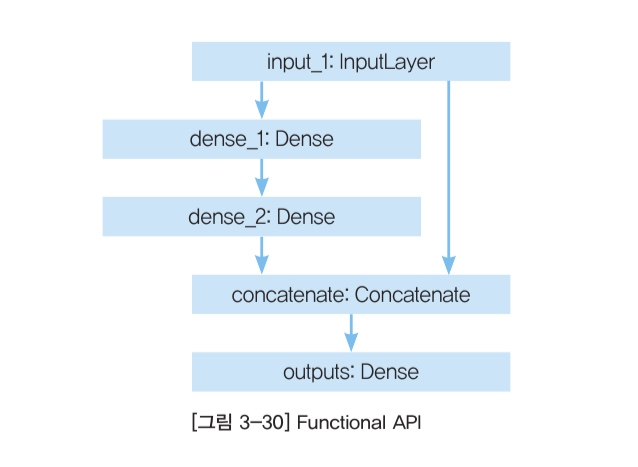


단방향의 Sequential 모델만 구현할 수 있다는 Sequential API의 단점 극복

In [ ]:
# 모델의 레이어를 체인 구조로 연결 Input 레이어 정의
input_layer = tf.keras.Input(shape=(28, 28), name='InputLayer')

# 모델의 레이어를 체인 구조로 연결
x1 = tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1) #name 매개변수로 이름 부여
x3 = tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4 = tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

In [ ]:
# 모델 생성
func_model = tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

# 모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


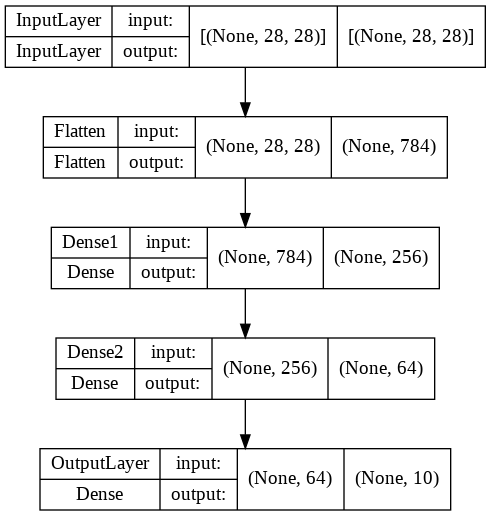

In [ ]:
from tensorflow.keras.utils import plot_model

# 구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [ ]:
# 컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
func_model.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2146 - accuracy: 0.9361
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0878 - accuracy: 0.9727
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0613 - accuracy: 0.9798
Functional Model] loss: 0.08353, acc: 0.97460


#### 모델 서브클래싱(Model Subclassing)

In [ ]:
class MyModel(tf.keras.Model):
    
    def __init__(self):
        super(MyModel, self).__init__()
        # 초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(10, activation='softmax')
        
    # class overiding
    # 학습용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

`call()`: fit()메소드가 호출되어 훈련되는 경우 호출될 함수

In [ ]:
# 모델 생성
mymodel = MyModel()

# 모델의 이름 설정
mymodel._name = 'subclass_model'

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         multiple                  0         
                                                                 
 dense_4 (Dense)             multiple                  200960    
                                                                 
 dense_5 (Dense)             multiple                  16448     
                                                                 
 dense_6 (Dense)             multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss: {loss:.5f}, acc: {acc:.5f}')

#### 서브클래싱 모델 파라미터를 활용한 생성

서브클래싱의 장점: 생성자 파라미터로 모델 내부 레이어의 하이퍼파라미터 지정 가능

In [ ]:
class MyModel(tf.keras.Model):
    
    # 생성자 parameter 추가
    def __init__(self, units, num_classes):
        super(MyModel, self).__init__()
        # 초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units, activation='relu')
        self.dense2 = tf.keras.layers.Dense(units/4, activation='relu')
        self.dense3 = tf.keras.layers.Dense(num_classes, activation='softmax')
        
    # class overiding
    # 학습용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

생성자 파라미터로 기준이 되는 unit의 개수를 입력받아 Dense 레이어의 유닛 개수를 계산, 설정

In [ ]:
# 모델 생성
mymodel = MyModel(256, 10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         multiple                  0         
                                                                 
 dense_7 (Dense)             multiple                  200960    
                                                                 
 dense_8 (Dense)             multiple                  16448     
                                                                 
 dense_9 (Dense)             multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model w. parameters] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2114 - accuracy: 0.9369
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0871 - accuracy: 0.9728
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0602 - accuracy: 0.9811
Subclassing Model w. parameters] loss: 0.06878, acc: 0.97700
